# Proyecto Final de Aprendizaje Automático

---

## Predicciones con el Modelo 1 y el Modelo 2

**Autor**: Andrés Gil Vicente  
**Fecha de entrega**: 04/05/2025  

---

### Objetivos:

Este fichero tiene como objetivo principal realizar las predicciones de la variable objetivo **`T3`**, sobre el conjunto de datos de test, utilizando los dos modelos que previamente han sido seleccionados:

1. **Modelo 1**: Utiliza todas las variables disponibles en el conjunto de datos de test para realizar las predicciones.  
2. **Modelo 2**: Realiza las predicciones de la variable objetivo **`T3`**, pero sin utilizar las variables **`T1`** ni **`T2`**.

A lo largo de este proceso, se realizarán las siguientes tareas:

1. **Cargar los modelos entrenados**: Se cargarán los modelos previamente entrenados y guardados en el proceso de entrenamiento.  
2. **Preparación de los datos de test**: Se procesarán los datos de test para que sean compatibles con los modelos (**preprocesado.ipynb**)
3. **Predicción con ambos modelos**: Se generarán las predicciones de la variable objetivo **`T3`** utilizando ambos modelos.  
4. **Almacenamiento de las predicciones**: Las predicciones generadas por ambos modelos se guardarán en un archivo CSV llamado `predicciones_finales.csv`, con dos columnas:  
    - `Modelo_i`: Predicciones realizadas por el Modelo 1.  
    - `Modelo_ii`: Predicciones realizadas por el Modelo 2.  

---

### Resultados:

Al final de este proceso, se obtendrá un archivo CSV con las predicciones de la variable objetivo **`T3`** generadas por ambos modelos. Este archivo permitirá comparar el rendimiento de los modelos y analizar cuál de ellos se adapta mejor a nuestras necesidades.


### Importamos las librerías necesarias:

In [65]:
from funciones import*

### Cargamos el fichero de datos de test:

In [66]:
# Definimos cual es la variable objetivo
variable_objetivo = "T3"

# Cargamos el conjunto de test que es el que queremos predecir
carpeta_datos_input = "data"
df_test = pd.read_csv(f"{carpeta_datos_input}/rendimiento_estudiantes_test_vacio.csv", delimiter=",")
df_test.drop(columns={variable_objetivo}, inplace=True)

### Preprocesamos los datos de test:

In [67]:
# Vemos cuáles son las columnas de nuestro dataset
df_test.columns

Index(['escuela', 'sexo', 'edad', 'entorno', 'TamFam', 'EstPadres', 'Medu',
       'Pedu', 'Mtrab', 'Ptrab', 'razon', 'tutor', 'TiempoViaje',
       'TiempoEstudio', 'suspensos', 'apoyo', 'ApFam', 'academia', 'extras',
       'enfermeria', 'EstSup', 'internet', 'pareja', 'RelFam', 'TiempoLib',
       'SalAm', 'AlcSem', 'AlcFin', 'salud', 'faltas', 'asignatura', 'T1',
       'T2'],
      dtype='object')

In [68]:
# Extraemos cúales son las variables que tienen valores categóricos y queremos codificar
indices_columnas_categoricas = np.where(df_test.dtypes == object)
columnas_categoricas = list(df_test.columns[indices_columnas_categoricas])
columnas_categoricas

['escuela',
 'sexo',
 'entorno',
 'TamFam',
 'EstPadres',
 'Mtrab',
 'Ptrab',
 'razon',
 'tutor',
 'apoyo',
 'ApFam',
 'academia',
 'extras',
 'enfermeria',
 'EstSup',
 'internet',
 'pareja',
 'asignatura']

In [69]:
# Extraemos las columnas ordinales
columnas_ordinales = [
    col for col in df_test.columns
    if set(df_test[col].dropna().unique()).issubset({0, 1, 2, 3, 4, 5})
]

# Mostramos las columnas ordinales
columnas_ordinales

['Medu',
 'Pedu',
 'TiempoViaje',
 'TiempoEstudio',
 'suspensos',
 'RelFam',
 'TiempoLib',
 'SalAm',
 'AlcSem',
 'AlcFin',
 'salud']

#### Exploramos y gestionamos valores nulos o faltantes:

In [70]:
# Exploramos los valores nulos o faltantes del dataframe de train
for col in df_test.columns:
    nulos = df_test[col].isna().sum()
    if nulos > 0:
        print(f"Feature: {col} --> Na Values: {nulos}")


No hay ningún valor nulo o faltante, por lo que no tenemos que hacer nada en ese aspecto.

In [71]:
for col in columnas_categoricas:
    print(f"{col}: {list(df_test[col].unique())} ")


escuela: ['BG', 'IC'] 
sexo: ['F', 'M'] 
entorno: ['U', 'R'] 
TamFam: ['>=4', '<4'] 
EstPadres: ['J', 'S'] 
Mtrab: ['casa', 'docencia', 'servicios', 'otros', 'sanidad'] 
Ptrab: ['servicios', 'docencia', 'otros', 'casa', 'sanidad'] 
razon: ['optativas', 'reputacion', 'otras', 'cercania', 'otros'] 
tutor: ['madre', 'padre', 'otros'] 
apoyo: ['no', 'si'] 
ApFam: ['no', 'si'] 
academia: ['no', 'si'] 
extras: ['si', 'no'] 
enfermeria: ['si', 'no'] 
EstSup: ['si', 'no'] 
internet: ['si', 'no'] 
pareja: ['no', 'si'] 
asignatura: ['M', 'L'] 


In [72]:
df_test["razon"].value_counts()

razon
optativas     82
cercania      54
reputacion    50
otras         16
otros          7
Name: count, dtype: int64

Nos damos cuenta también, de que hay algunos valores en la columna de `razon`, que tienen el valor de "otros" o de "otras". Consideramos que esto es un fallo de transcripción por lo tanto modificamos a mano los datos para dejarlos consistentes. Imputaremos todos los valores que aparezcan como "otras", dejándolos como "otros".

In [73]:
# Imputamos el valor de "otros" en aquellos lugares donde pone "otras"
df_test = eliminar_anomalias_razon(df_test)

# Comprobamos que ya no hay la anomalía de "otras"
print(f"{col}: {list(df_test["razon"].unique())} ")

asignatura: ['optativas', 'reputacion', 'otros', 'cercania'] 


Sin embargo en las columnas ordinales, parece no haber ningún valor fuera del rango establecido.

In [74]:
for col in columnas_ordinales:
    print(f"{col}: {list(df_test[col].unique())} ")

Medu: [1, 4, 2, 3] 
Pedu: [1, 4, 3, 2] 
TiempoViaje: [1, 2, 3, 4] 
TiempoEstudio: [2, 1, 4, 3] 
suspensos: [0, 1, 3, 2] 
RelFam: [5, 3, 4, 1, 2] 
TiempoLib: [3, 5, 1, 2, 4] 
SalAm: [3, 5, 1, 2, 4] 
AlcSem: [1, 2, 4, 3, 5] 
AlcFin: [1, 5, 3, 2, 4] 
salud: [3, 4, 5, 2, 1] 


### Codificamos las variables categóricas del dataset:

Aplicaremos dummy encoding para tener menos columnas que si hiciéramos one-hot encoding, para ello empleamos una función que hemos programado en funciones.py

In [75]:
# Codificamos las variables categóricas del dataset
df_test_encoded = df_test.copy() 
df_test_encoded = dummy_encoding(X=df_test_encoded, categorical_columns=columnas_categoricas)
df_test_encoded.head()

,edad,Medu,Pedu,TiempoViaje,TiempoEstudio,suspensos,RelFam,TiempoLib,SalAm,AlcSem,...,tutor_padre,apoyo_si,ApFam_si,academia_si,extras_si,enfermeria_si,EstSup_si,internet_si,pareja_si,asignatura_M
0,17,1,1,1,2,0,5,3,3,1,...,0,0,0,0,1,1,1,1,0,1
1,16,4,4,1,1,0,3,5,5,2,...,0,0,0,0,1,1,1,1,0,0
2,17,2,3,1,2,0,5,3,3,1,...,1,0,1,0,0,0,1,1,0,0
3,15,2,3,2,1,0,3,5,1,1,...,1,0,1,0,1,1,1,0,0,0
4,15,4,3,1,2,0,4,5,2,1,...,0,0,1,0,1,1,1,1,1,0


In [76]:
# Comrpobamos como nos quedan las columnas tras codificar con dummy
df_test_encoded.columns

Index(['edad', 'Medu', 'Pedu', 'TiempoViaje', 'TiempoEstudio', 'suspensos',
       'RelFam', 'TiempoLib', 'SalAm', 'AlcSem', 'AlcFin', 'salud', 'faltas',
       'T1', 'T2', 'escuela_IC', 'sexo_M', 'entorno_U', 'TamFam_>=4',
       'EstPadres_S', 'Mtrab_docencia', 'Mtrab_otros', 'Mtrab_sanidad',
       'Mtrab_servicios', 'Ptrab_docencia', 'Ptrab_otros', 'Ptrab_sanidad',
       'Ptrab_servicios', 'razon_optativas', 'razon_otros', 'razon_reputacion',
       'tutor_otros', 'tutor_padre', 'apoyo_si', 'ApFam_si', 'academia_si',
       'extras_si', 'enfermeria_si', 'EstSup_si', 'internet_si', 'pareja_si',
       'asignatura_M'],
      dtype='object')

#### Valores físicamente imposibles:


In [77]:
for col in df_test_encoded.columns:
    for elem in df_test_encoded[col]:
        if elem < 0:
            print(col)
            print(elem)
            print()

Comprobamos que no existe ningún valor negativo en el dataset. Tampoco hay ningún valor decimal en variables como "faltas", todo son enteros como debe ser.

#### Valores atípicos / outliers:

En el dataset de test no hay valores atípicos por lo que no tenemos que hacer nada en este caso. Si los hubiera, los gestionaríamos de forma similar a lo que hicimos en preprocesado.ipynb .

In [78]:
df_test_encoded.query("faltas > 100")["faltas"]

Series([], Name: faltas, dtype: int64)

#### Estandarización del dataset de test

Igual que hicimos con el conjunto de train y de validación, debemos estandarizar las variables del conjunto de test, para que cuando pasemos estos datos a los modelos como inputs, nos generen predicciones coherentes y en las escalas que esperamos.

In [79]:
# Elegimos qué columnas queremos estandarizar (solo las numéricas que no sean de 0 y 1, es decir incluyendo ordinales, pero excluyendo T3)
columnas_estandarizar = [
    col for col in df_test_encoded.columns
    if col != variable_objetivo and not set(df_test_encoded[col].dropna().unique()).issubset({0, 1})
]

columnas_estandarizar

['edad',
 'Medu',
 'Pedu',
 'TiempoViaje',
 'TiempoEstudio',
 'suspensos',
 'RelFam',
 'TiempoLib',
 'SalAm',
 'AlcSem',
 'AlcFin',
 'salud',
 'faltas',
 'T1',
 'T2']

In [80]:
# Extraemos los datos necesarios para la estandarización, los habíamos almacenado en un csv
carpeta_datos_procesados = "processed_data"
stats_estandarizacion_train = pd.read_csv(f"{carpeta_datos_procesados}/stats_estadarizar_train.csv")
stats_estandarizacion_train.head(15)

,Unnamed: 0,mean,std
0,edad,16.741438,1.190267
1,Medu,2.684932,1.089500
2,Pedu,2.359589,1.041577
3,TiempoViaje,1.532534,0.714205
4,TiempoEstudio,1.962329,0.837757
5,suspensos,0.268836,0.647985
6,RelFam,3.921233,0.926434
7,TiempoLib,3.152397,1.050555
8,SalAm,3.095890,1.151202
9,AlcSem,1.455479,0.877430


In [81]:
# Convertimos el dataframe de estadísticas (medias y desviaciones típicas) en un diccionario
stats_dict = stats_estandarizacion_train.set_index('Unnamed: 0').apply(tuple, axis=1).to_dict()
stats_dict

{'edad': (16.741438356164384, 1.1902672716712417),
 'Medu': (2.684931506849315, 1.089500331804532),
 'Pedu': (2.3595890410958904, 1.0415767679747232),
 'TiempoViaje': (1.5325342465753424, 0.7142051073468484),
 'TiempoEstudio': (1.962328767123288, 0.8377573927982884),
 'suspensos': (0.2688356164383562, 0.6479851450703684),
 'RelFam': (3.921232876712329, 0.926433535070674),
 'TiempoLib': (3.1523972602739727, 1.0505545736607305),
 'SalAm': (3.095890410958904, 1.1512020244844905),
 'AlcSem': (1.4554794520547945, 0.8774304307533727),
 'AlcFin': (2.2585616438356166, 1.2670498898207283),
 'salud': (3.535958904109589, 1.4330363732375329),
 'faltas': (7.801369863013699, 22.40569942899391),
 'T1': (11.188356164383562, 3.084649322712856),
 'T2': (11.241438356164384, 3.3536435197046486)}

In [82]:
# Restamos la media y dividimos entre la desviación típica, para cada dato y cada columna (usando las stats de train)
for col in columnas_estandarizar:
    df_test_encoded[col] = (df_test_encoded[col] - stats_dict[col][0]) / stats_dict[col][1]

# Volvemos a comprobar cuáles son las estadísticas para ver que ha ido bien el proceso de estandarización
df_test_encoded.describe()

,edad,Medu,Pedu,TiempoViaje,TiempoEstudio,suspensos,RelFam,TiempoLib,SalAm,AlcSem,...,tutor_padre,apoyo_si,ApFam_si,academia_si,extras_si,enfermeria_si,EstSup_si,internet_si,pareja_si,asignatura_M
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,...,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,-0.112397,-0.193894,-0.069613,-0.002008,0.096369,-0.126905,0.131504,0.046223,0.132829,0.015295,...,0.263158,0.105263,0.583732,0.229665,0.464115,0.775120,0.928230,0.784689,0.339713,0.377990
std,1.022063,1.053658,1.002478,1.132377,1.022457,0.840669,0.936628,0.986840,1.016920,1.030484,...,0.441405,0.307629,0.494123,0.421627,0.499908,0.418506,0.258727,0.412025,0.474749,0.486049
min,-1.463065,-1.546518,-1.305318,-0.745632,-1.148696,-0.414879,-3.153203,-2.048820,-1.820610,-0.519106,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.622918,-0.628666,-1.305318,-0.745632,-1.148696,-0.414879,0.085022,-0.145064,-0.951953,-0.519106,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.217230,-0.628666,-0.345235,-0.745632,0.044967,-0.414879,0.085022,-0.145064,-0.083296,-0.519106,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,0.217230,1.207038,0.614848,0.654526,0.044967,-0.414879,1.164430,0.806815,0.785361,0.620585,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.577820,1.207038,1.574930,3.454842,2.432293,4.214856,1.164430,1.758693,1.654019,4.039660,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Guardamos el dataset en formato array para los datos de test:

In [83]:
# Almacenamos los datos de test en formato array
x_test = df_test_encoded[[var for var in df_test_encoded.columns if var != variable_objetivo]].to_numpy()
len(x_test)

209

### Predecimos con el Modelo 1:

#### Cargamos los datos de entrenamiento:

In [84]:
# Cargamos el conjunto de train con el que vamos a entrenar los modelos 
df_train = pd.read_csv(f"{carpeta_datos_procesados}/df_train.csv", delimiter=",")

# Separamos en x e y
x_train = df_train[[var for var in df_train.columns if var != variable_objetivo]].to_numpy()
y_train = df_train[variable_objetivo].to_numpy()

len(x_train)

584

#### Usamos el modelo de Regresión Lineal:

In [85]:
# Instanciamos el modelo de regresión
modelo1 = LinearRegressor()

# Entrenamos el modelo
modelo1.fit(x_train, y_train)

# Predecimos sobre los datos de test
y_pred1 = modelo1.predict(x_test)

Comprobamos si hay valores en las predicciones que se salen de los límites físicos de las calificaciones (0-20):

In [86]:
print(f"Mínimo de las predicciones: {y_pred1.min()}")
print(f"Máximo de las predicciones: {y_pred1.max()}")

Mínimo de las predicciones: -1.53379292628893
Máximo de las predicciones: 19.00318503330885


Hacemos un clip inferior para que no haya ninguna predicción de notas negativas:

In [87]:
# Clip inferior y superior (por si acaso)
y_pred1 = np.clip(y_pred1, 0, 20)

# Comprobación
print(f"Mínimo de las predicciones: {y_pred1.min()}")
print(f"Máximo de las predicciones: {y_pred1.max()}")

Mínimo de las predicciones: 0.0
Máximo de las predicciones: 19.00318503330885


### Predecimos con el Modelo 2:

In [88]:
# Parámetros del bosque
n_estimators = 275
max_features = 0.8
max_samples = 0.7

# Separación explícita de variables predictoras y objetivo
X_train = df_train.drop(columns=[variable_objetivo])
y_train = df_train[variable_objetivo]

X_test = df_test_encoded

# Lista donde vamos a ir guardando nuestras predicciones, el voto de cada árbol del bosque
predictions = []

# Creamos tantos modelos y predicciones, como el número de árboles hemos definido
for _ in range(n_estimators):
    
    # Bootstrap: muestreo de filas
    sample_indices = np.random.choice(X_train.index, size=int(len(X_train)*max_samples), replace=True)
    X_bootstrap = X_train.loc[sample_indices]
    y_bootstrap = y_train.loc[sample_indices]

    # Selección aleatoria de variables (sin reemplazo)
    feature_indices = np.random.choice(X_train.columns, size=int(X_train.shape[1]*max_features), replace=False)
    X_bootstrap_subset = X_bootstrap[feature_indices]
    X_test_subset = X_test[feature_indices]

    # Entrenamiento del árbol
    tree = DecisionTreeRegressor()  # Sin restricciones
    tree.fit(X_bootstrap_subset, y_bootstrap)

    # Predicción sobre test
    y_pred = tree.predict(X_test_subset)
    predictions.append(y_pred)

# Promediamos las predicciones (voto por promedio)
y_pred2 = np.mean(predictions, axis=0)

Comprobamos si hay valores en las predicciones que se salen de los límites físicos de las calificaciones (0-20):

In [89]:
print(f"Mínimo de las predicciones: {y_pred2.min()}")
print(f"Máximo de las predicciones: {y_pred2.max()}")

Mínimo de las predicciones: 0.6909090909090909
Máximo de las predicciones: 17.683636363636364


Las predicciones no se salen de los límites, pero aplicamos un clip por si acaso:

In [90]:
# Clip inferior y superior (por si acaso)
y_pred2 = np.clip(y_pred2, 0, 20)

# Comprobación
print(f"Mínimo de las predicciones: {y_pred2.min()}")
print(f"Máximo de las predicciones: {y_pred2.max()}")

Mínimo de las predicciones: 0.6909090909090909
Máximo de las predicciones: 17.683636363636364


### Comparamos las predicciones de ambos modelos:

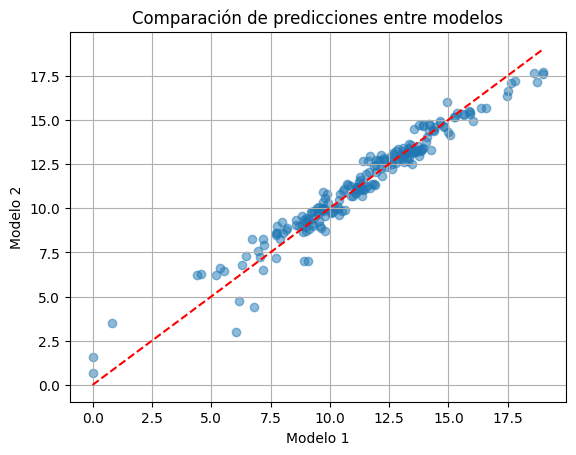

In [91]:
# Scatter plot para ver cómo de distintas son las predicciones de uno y otro modelo
plt.scatter(y_pred1, y_pred2, alpha=0.5)
plt.xlabel('Modelo 1')
plt.ylabel('Modelo 2')
plt.title('Comparación de predicciones entre modelos')
plt.plot([min(y_pred1.min(), y_pred2.min()), max(y_pred1.max(), y_pred2.max())],
         [min(y_pred1.min(), y_pred2.min()), max(y_pred1.max(), y_pred2.max())],
         'r--')  # línea identidad
plt.grid(True)
plt.show()

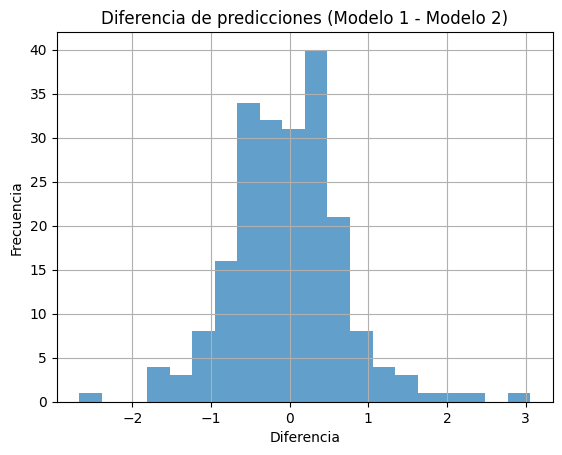

Máxima diferencia entre predicciones: 3.060324940174527


In [92]:
# Histograma para ver cuáles son las diferencias más frecuentes entre las predicciones de uno y del otro modelo
diferencias = y_pred1 - y_pred2

plt.hist(diferencias, bins=20, alpha=0.7)
plt.title('Diferencia de predicciones (Modelo 1 - Modelo 2)')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

print(f"Máxima diferencia entre predicciones: {np.max(np.abs(diferencias))}")

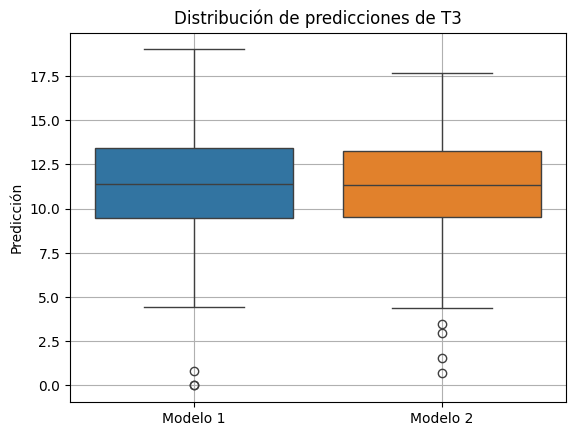

In [93]:
# Boxplots de ambas predicciones
sns.boxplot(data=[y_pred1, y_pred2])
plt.xticks([0, 1], ['Modelo 1', 'Modelo 2'])
plt.title('Distribución de predicciones de T3')
plt.ylabel('Predicción')
plt.grid(True)
plt.show()


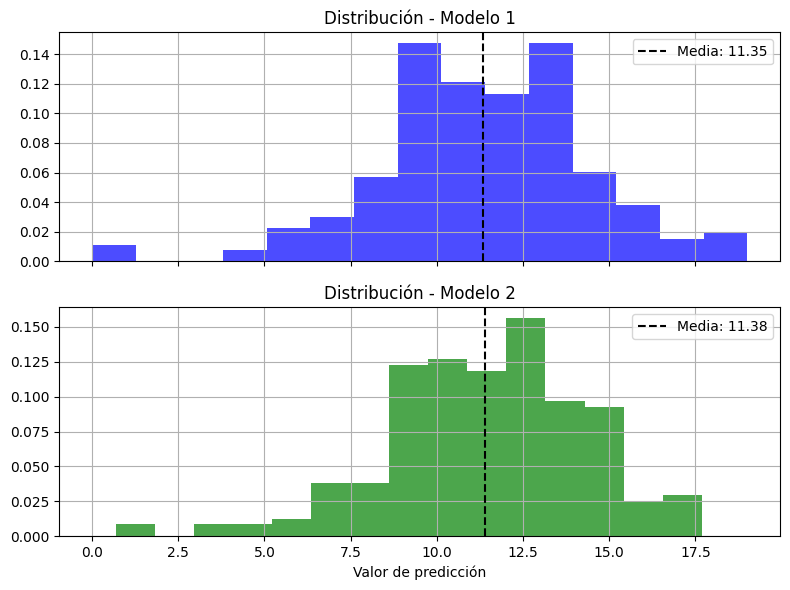

In [94]:
# Distribuciones de ambas predicciones 
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Calcular medias
media1 = np.mean(y_pred1)
media2 = np.mean(y_pred2)

# Modelo 1
axs[0].hist(y_pred1, bins=15, alpha=0.7, color='blue', density=True)
axs[0].axvline(media1, color='black', linestyle='--', label=f'Media: {media1:.2f}')
axs[0].set_title('Distribución - Modelo 1')
axs[0].legend()
axs[0].grid(True)

# Modelo 2
axs[1].hist(y_pred2, bins=15, alpha=0.7, color='green', density=True)
axs[1].axvline(media2, color='black', linestyle='--', label=f'Media: {media2:.2f}')
axs[1].set_title('Distribución - Modelo 2')
axs[1].set_xlabel('Valor de predicción')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

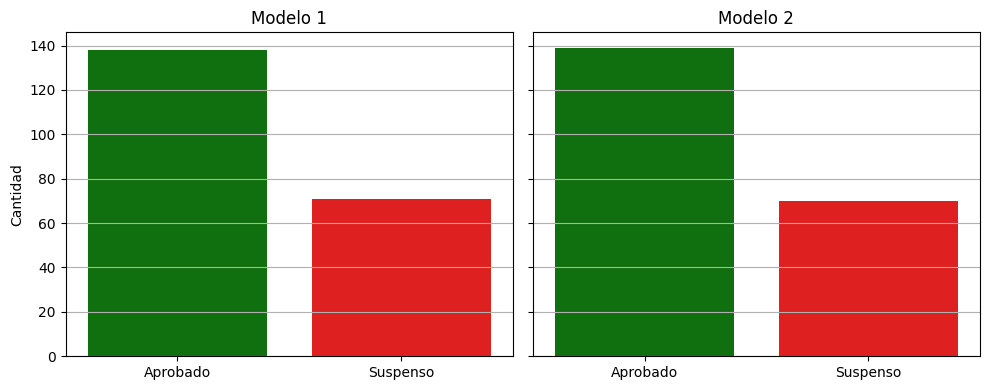

In [95]:
# Clasificación binaria: 'Aprobado' (≥10), 'Suspenso' (<10)
aprobado1 = np.where(y_pred1 >= 10, 'Aprobado', 'Suspenso')
aprobado2 = np.where(y_pred2 >= 10, 'Aprobado', 'Suspenso')

# Convertir a pandas Series categóricas
df1 = pd.DataFrame({'Resultado': pd.Series(aprobado1, dtype='category')})
df2 = pd.DataFrame({'Resultado': pd.Series(aprobado2, dtype='category')})

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Modelo 1
sns.countplot(data=df1, x='Resultado', hue='Resultado',
              palette={'Aprobado': 'green', 'Suspenso': 'red'},
              ax=axs[0], legend=False)
axs[0].set_title('Modelo 1')
axs[0].set_xlabel('')
axs[0].set_ylabel('Cantidad')
axs[0].grid(True, axis='y')

# Modelo 2
sns.countplot(data=df2, x='Resultado', hue='Resultado',
              palette={'Aprobado': 'green', 'Suspenso': 'red'},
              ax=axs[1], legend=False)
axs[1].set_title('Modelo 2')
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()


Analizando estos gráficos comparativos entre las predicciones del modelo 1 y las predicciones del modelo 2, podemos ver que hay algunas diferencias entre unas y otras, pero que a niveles generales son bastante parecidas. También hay que tener en cuenta que se han utilizado distintos modelos y que las tareas de uno y otro eran sustancialmente diferentes, por lo que haber llegado a predicciones más o menos similares es una buena noticia.

### Guardamos las predicciones de ambos modelos:

In [96]:
# Guardamos las predicciones, que se encontraban almacenadas en arrays de numpy
submission = pd.DataFrame({
'Modelo_i': y_pred1,
'Modelo_ii': y_pred2
})

# Carpeta donde vamos a guardar los resultados de las predicciones
carpeta_predicciones_entrega = "submission"
os.makedirs(carpeta_predicciones_entrega, exist_ok=True)

# Convertimos el dataframe en csv
submission.to_csv(f'{carpeta_predicciones_entrega}/predicciones_finales.csv', index=False)